# Feature variation by substitution ($\nu_{\phi}$)

## 1 Setup

Flags and settings.

In [1]:
SAVE_FIGURES = False
PAPER_FEATURES = ['frequency', 'aoa', 'clustering', 'letters_count', 'synonyms_count',
                  'orthographical_density']
N_COMPONENTS = 3

Imports and database setup.

In [2]:
import pandas as pd
import seaborn as sb
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from progressbar import ProgressBar

%cd -q ..
from brainscopypaste.conf import settings
%cd -q notebooks
from brainscopypaste.mine import Model, Time, Source, Past, Durl
from brainscopypaste.db import Substitution
from brainscopypaste.utils import init_db, session_scope
engine = init_db()

## 2 Variation of features upon substitution

First build our data.

In [3]:
model = Model(time=Time.continuous, source=Source.majority, past=Past.last_bin, durl=Durl.exclude_past)
data = []

with session_scope() as session:
    substitutions = session.query(Substitution.id).filter(Substitution.model == model)
    print("Got {} substitutions for model {}".format(substitutions.count(), model))
    substitution_ids = [id for (id,) in substitutions]

for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for feature in Substitution.__features__:
            source, destination = substitution.features(feature)
            source_rel, destination_rel = substitution.features(feature,
                                                                sentence_relative='median')
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'feature': feature,
                         'source': source,
                         'source_rel': source_rel,
                         'destination': destination,
                         'destination_rel': destination_rel,
                         'h0': substitution.feature_average(feature),
                         'h0_rel': substitution.feature_average(feature,
                                                                sentence_relative='median'),
                         'h0n': substitution.feature_average(feature,
                                                             source_synonyms=True),
                         'h0n_rel': substitution.feature_average(feature,
                                                                 source_synonyms=True,
                                                                 sentence_relative='median')})

original_variations = pd.DataFrame(data)
del data

Got 1678 substitutions for model Model(time=Time.continuous, source=Source.majority, past=Past.last_bin, durl=Durl.exclude_past)


  0% (   1 of 1678) |                     | Elapsed Time: 0:00:30 ETA:  14:21:55

  1% (  21 of 1678) |                      | Elapsed Time: 0:00:32 ETA:  0:01:13

  2% (  42 of 1678) |                      | Elapsed Time: 0:00:32 ETA:  0:00:35

  3% (  63 of 1678) |                      | Elapsed Time: 0:00:32 ETA:  0:00:22

  5% (  84 of 1678) |#                     | Elapsed Time: 0:00:33 ETA:  0:00:15

  6% ( 105 of 1678) |#                     | Elapsed Time: 0:00:33 ETA:  0:00:12

  7% ( 126 of 1678) |#                     | Elapsed Time: 0:00:34 ETA:  0:00:09

  8% ( 147 of 1678) |#                     | Elapsed Time: 0:00:34 ETA:  0:00:08

 10% ( 168 of 1678) |##                    | Elapsed Time: 0:00:35 ETA:  0:00:07

 11% ( 189 of 1678) |##                    | Elapsed Time: 0:00:35 ETA:  0:00:06

 12% ( 210 of 1678) |##                    | Elapsed Time: 0:00:35 ETA:  0:00:00

 13% ( 231 of 1678) |###                   | Elapsed Time: 0:00:36 ETA:  0:00:00

 15% ( 252 of 1678) |###                   | Elapsed Time: 0:00:36 ETA:  0:00:00

 16% ( 273 of 1678) |###                   | Elapsed Time: 0:00:37 ETA:  0:00:00

 17% ( 294 of 1678) |###                   | Elapsed Time: 0:00:37 ETA:  0:00:00

 18% ( 315 of 1678) |####                  | Elapsed Time: 0:00:37 ETA:  0:00:00

 20% ( 336 of 1678) |####                  | Elapsed Time: 0:00:38 ETA:  0:00:00

 21% ( 357 of 1678) |####                  | Elapsed Time: 0:00:38 ETA:  0:00:00

 22% ( 378 of 1678) |####                  | Elapsed Time: 0:00:39 ETA:  0:00:00

 23% ( 399 of 1678) |#####                 | Elapsed Time: 0:00:39 ETA:  0:00:00

 25% ( 420 of 1678) |#####                 | Elapsed Time: 0:00:39 ETA:  0:00:00

 26% ( 441 of 1678) |#####                 | Elapsed Time: 0:00:40 ETA:  0:00:00

 27% ( 462 of 1678) |######                | Elapsed Time: 0:00:40 ETA:  0:00:00

 28% ( 483 of 1678) |######                | Elapsed Time: 0:00:40 ETA:  0:00:00

 30% ( 504 of 1678) |######                | Elapsed Time: 0:00:41 ETA:  0:00:00

 31% ( 525 of 1678) |######                | Elapsed Time: 0:00:41 ETA:  0:00:00

 32% ( 546 of 1678) |#######               | Elapsed Time: 0:00:42 ETA:  0:00:00

 33% ( 567 of 1678) |#######               | Elapsed Time: 0:00:42 ETA:  0:00:00

 35% ( 588 of 1678) |#######               | Elapsed Time: 0:00:42 ETA:  0:00:00

 36% ( 609 of 1678) |#######               | Elapsed Time: 0:00:43 ETA:  0:00:00

 37% ( 630 of 1678) |########              | Elapsed Time: 0:00:43 ETA:  0:00:00

 38% ( 651 of 1678) |########              | Elapsed Time: 0:00:44 ETA:  0:00:00

 40% ( 672 of 1678) |########              | Elapsed Time: 0:00:44 ETA:  0:00:00

 41% ( 693 of 1678) |#########             | Elapsed Time: 0:00:44 ETA:  0:00:00

 42% ( 714 of 1678) |#########             | Elapsed Time: 0:00:45 ETA:  0:00:00

 43% ( 735 of 1678) |#########             | Elapsed Time: 0:00:45 ETA:  0:00:00

 45% ( 756 of 1678) |#########             | Elapsed Time: 0:00:46 ETA:  0:00:00

 46% ( 777 of 1678) |##########            | Elapsed Time: 0:00:46 ETA:  0:00:00

 47% ( 798 of 1678) |##########            | Elapsed Time: 0:00:46 ETA:  0:00:00

 48% ( 819 of 1678) |##########            | Elapsed Time: 0:00:47 ETA:  0:00:00

 50% ( 840 of 1678) |###########           | Elapsed Time: 0:00:47 ETA:  0:00:00

 51% ( 860 of 1678) |###########           | Elapsed Time: 0:00:48 ETA:  0:00:00

 52% ( 881 of 1678) |###########           | Elapsed Time: 0:00:48 ETA:  0:00:00

 53% ( 902 of 1678) |###########           | Elapsed Time: 0:00:48 ETA:  0:00:00

 55% ( 923 of 1678) |############          | Elapsed Time: 0:00:49 ETA:  0:00:00

 56% ( 944 of 1678) |############          | Elapsed Time: 0:00:49 ETA:  0:00:00

 57% ( 965 of 1678) |############          | Elapsed Time: 0:00:50 ETA:  0:00:00

 58% ( 986 of 1678) |############          | Elapsed Time: 0:00:50 ETA:  0:00:00

 60% (1007 of 1678) |#############         | Elapsed Time: 0:00:50 ETA:  0:00:00

 61% (1028 of 1678) |#############         | Elapsed Time: 0:00:51 ETA:  0:00:00

 62% (1049 of 1678) |#############         | Elapsed Time: 0:00:51 ETA:  0:00:00

 63% (1070 of 1678) |##############        | Elapsed Time: 0:00:52 ETA:  0:00:00

 65% (1091 of 1678) |##############        | Elapsed Time: 0:00:52 ETA:  0:00:00

 66% (1112 of 1678) |##############        | Elapsed Time: 0:00:52 ETA:  0:00:00

 67% (1133 of 1678) |##############        | Elapsed Time: 0:00:53 ETA:  0:00:00

 68% (1154 of 1678) |###############       | Elapsed Time: 0:00:53 ETA:  0:00:00

 70% (1175 of 1678) |###############       | Elapsed Time: 0:00:54 ETA:  0:00:00

 71% (1196 of 1678) |###############       | Elapsed Time: 0:00:54 ETA:  0:00:00

 72% (1217 of 1678) |###############       | Elapsed Time: 0:00:55 ETA:  0:00:00

 73% (1238 of 1678) |################      | Elapsed Time: 0:00:55 ETA:  0:00:00

 75% (1259 of 1678) |################      | Elapsed Time: 0:00:55 ETA:  0:00:00

 76% (1280 of 1678) |################      | Elapsed Time: 0:00:56 ETA:  0:00:00

 77% (1301 of 1678) |#################     | Elapsed Time: 0:00:56 ETA:  0:00:00

 78% (1322 of 1678) |#################     | Elapsed Time: 0:00:57 ETA:  0:00:00

 80% (1343 of 1678) |#################     | Elapsed Time: 0:00:57 ETA:  0:00:00

 81% (1364 of 1678) |#################     | Elapsed Time: 0:00:57 ETA:  0:00:00

 82% (1385 of 1678) |##################    | Elapsed Time: 0:00:58 ETA:  0:00:00

 83% (1406 of 1678) |##################    | Elapsed Time: 0:00:58 ETA:  0:00:00

 85% (1427 of 1678) |##################    | Elapsed Time: 0:00:59 ETA:  0:00:00

 86% (1448 of 1678) |##################    | Elapsed Time: 0:00:59 ETA:  0:00:00

 87% (1469 of 1678) |###################   | Elapsed Time: 0:01:00 ETA:  0:00:00

 88% (1490 of 1678) |###################   | Elapsed Time: 0:01:00 ETA:  0:00:00

 90% (1511 of 1678) |###################   | Elapsed Time: 0:01:00 ETA:  0:00:00

 91% (1532 of 1678) |####################  | Elapsed Time: 0:01:01 ETA:  0:00:00

 92% (1553 of 1678) |####################  | Elapsed Time: 0:01:01 ETA:  0:00:00

 93% (1574 of 1678) |####################  | Elapsed Time: 0:01:02 ETA:  0:00:00

 95% (1595 of 1678) |####################  | Elapsed Time: 0:01:02 ETA:  0:00:00

 96% (1616 of 1678) |##################### | Elapsed Time: 0:01:03 ETA:  0:00:00

 97% (1637 of 1678) |##################### | Elapsed Time: 0:01:03 ETA:  0:00:00

 98% (1658 of 1678) |##################### | Elapsed Time: 0:01:03 ETA:  0:00:00

100% (1678 of 1678) |######################| Elapsed Time: 0:01:04 Time: 0:01:04


Compute cluster averages (so as not to overestimate confidence intervals) and crop data so that we have acceptable CIs.

In [4]:
variations = original_variations\
    .groupby(['destination_id', 'occurrence', 'feature'], as_index=False).mean()\
    .groupby(['cluster_id', 'feature'], as_index=False)\
    ['source', 'source_rel', 'destination', 'destination_rel', 'feature',
     'h0', 'h0_rel', 'h0n', 'h0n_rel'].mean()
variations['variation'] = variations['destination'] - variations['source']

# HARDCODED: drop values where source AoA is above 15.
# This crops the graphs to acceptable CIs.
variations.loc[(variations.feature == 'aoa') & (variations.source > 15),
               ['source', 'source_rel', 'destination', 'destination_rel',
                'h0', 'h0_rel', 'h0n', 'h0n_rel']] = np.nan

### 2.1 What we plot about features

For a feature $\phi$, plot:

* $\nu_{\phi}$, the variation of the feature upon substitution
* $\nu_{\phi}^0$ (which is the average feature value), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi}^{00}$ (which is the average feature value for synonyms of the source word), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

We also plot these values relative to the sentence average, i.e.:

* $\nu_{\phi, r}$, the variation, upon substitution, of the changing word's feature compared to the sentence average, i.e. $f($destination$) - f($destination sentence$) - (f($source$) - f($source sentence$))$
* $\nu_{\phi, r}^0$ (which is the average feature value minus the sentence average), i.e. what happens under $\mathcal{H}_0$
* $\nu_{\phi, r}^{00}$ (which is the average feature value for synonyms of the source word minus the sentence average), i.e. what happens under $\mathcal{H}_{00}$
* $y = x$, i.e. what happens if there is no substitution

Those values are plotted below in two groups each time, first the absolute feature values, then the relative-to-sentence features.

In [5]:
def plot_variation(x, y, **kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    relative = kwargs.get('relative', False)
    rel = '_rel' if relative else ''
    x = data[x + rel]
    y = data[y + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    middles = (bins[:-1] + bins[1:]) / 2
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    nuphi = r'\nu_{\phi' + (',r' if relative else '') + '}'
    plt.plot(middles, values, '-', lw=2, color=color, label='${}$'.format(nuphi))
    plt.fill_between(middles, values - cis, values + cis,
                     color=sb.desaturate(color, 0.2), alpha=0.2)
    plt.plot(middles, h0s, '--', color=sb.desaturate(color, 0.2),
             label='${}^0$'.format(nuphi))
    plt.plot(middles, h0ns, linestyle='-.', color=sb.desaturate(color, 0.2),
             label='${}^{{00}}$'.format(nuphi))
    plt.plot(middles, middles, linestyle='dotted', color=sb.desaturate(color, 0.2),
             label='$y = x$')
    lmin, lmax = middles[0], middles[-1]
    h0min, h0max = min(h0s.min(), h0ns.min()), max(h0s.max(), h0ns.max())
    # Rescale limits if we're touching H0 or H00.
    if h0min < lmin:
        lmin = h0min - (lmax - h0min) / 10
    elif h0max > lmax:
        lmax = h0max + (h0max - lmin) / 10
    plt.xlim(lmin, lmax)
    plt.ylim(lmin, lmax)

In [6]:
def plot_bias(ax, data, color, ci=True, relative=False):
    feature = data.iloc[0].feature
    rel = '_rel' if relative else ''
    x = data['source' + rel]
    y = data['destination' + rel]
    h0 = data['h0' + rel]
    h0n = data['h0n' + rel]
    
    # Compute binning.
    bin_count = 4
    x_bins, bins = pd.cut(x, bin_count, right=False, labels=False, retbins=True)
    
    # Compute bin values.
    h0s = np.zeros(bin_count)
    h0ns = np.zeros(bin_count)
    values = np.zeros(bin_count)
    cis = np.zeros(bin_count)
    for i in range(bin_count):
        h0s[i] = h0[x_bins == i].mean()
        h0ns[i] = h0n[x_bins == i].mean()
        values[i] = y[x_bins == i].mean()
        cis[i] = 1.96 * y[x_bins == i].std() / np.sqrt((x_bins == i).sum() - 1)
    
    # Plot.
    ax.plot(np.linspace(0, 1, bin_count), (values - h0ns) / h0s.mean(), '-', lw=2, color=color,
            label=Substitution._transformed_feature(feature).__doc__)
    if ci:
        ax.fill_between(np.linspace(0, 1, bin_count),
                        (values - h0ns - cis) / h0s.mean(), (values - h0ns + cis) / h0s.mean(),
                        color=sb.desaturate(color, 0.2), alpha=0.2)        

### 2.2 All feature variations

For each feature $\phi$, we plot the variation upon substitution as explained above

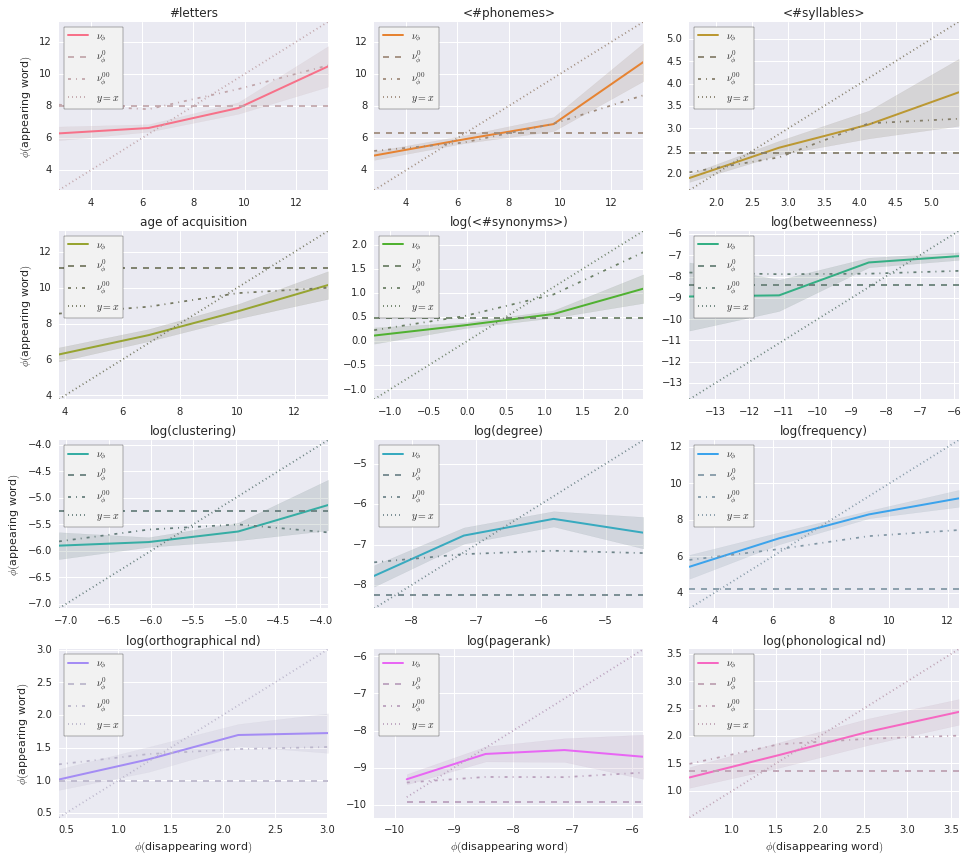

In [7]:
ordered_features = sorted(Substitution.__features__,
                          key=lambda f: Substitution._transformed_feature(f).__doc__)
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

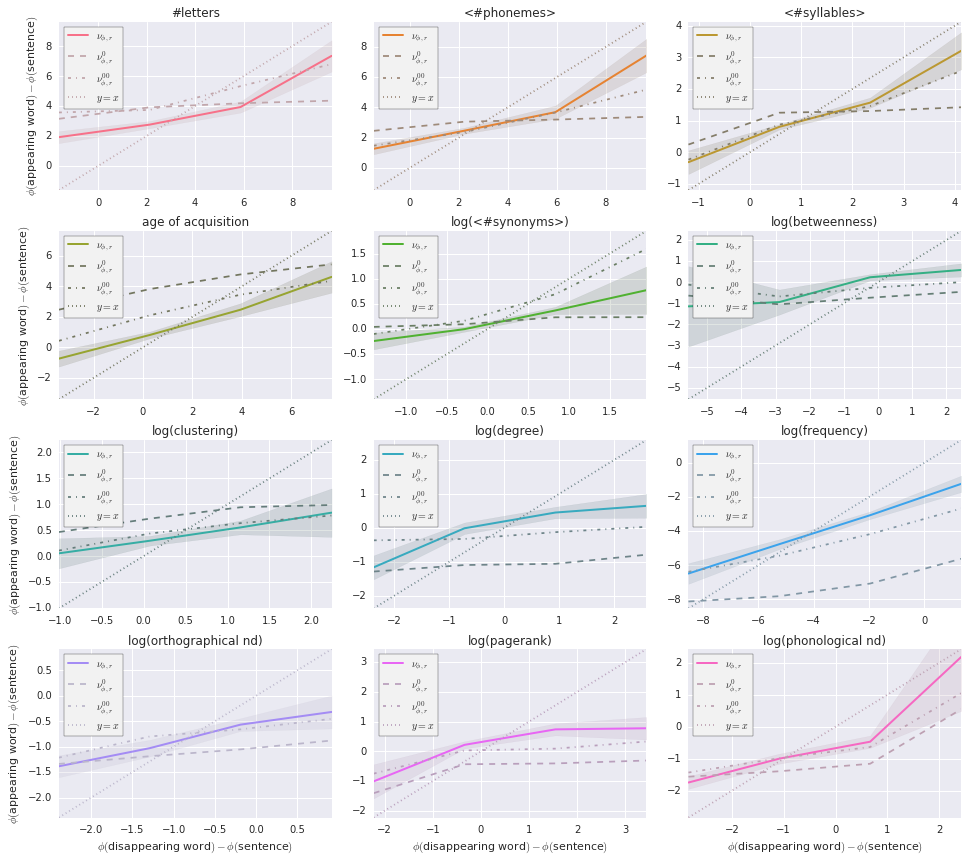

In [8]:
g = sb.FacetGrid(data=variations, col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_variation, 'source', 'destination', relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

Then plot $\nu_{\phi} - \nu_{\phi}^{00}$ for each feature (i.e. the measured bias) to see how they compare

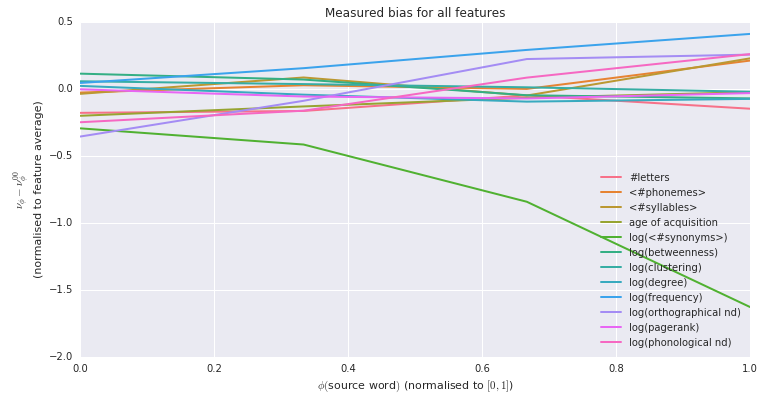

In [9]:
palette = sb.color_palette('husl', len(Substitution.__features__))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], ci=False)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

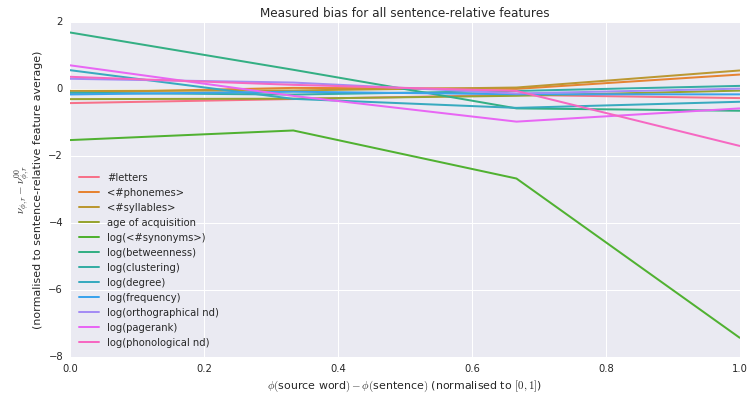

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(ordered_features):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], ci=False, relative=True)
ax.legend(loc='lower left')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('all-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

### 2.3 Feature variations, reduced to features we expose in the paper

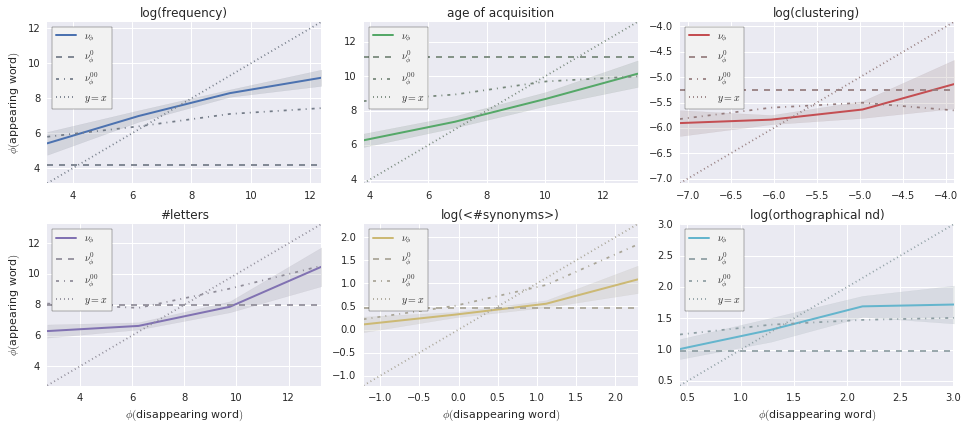

In [11]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$)$')
g.set_ylabels(r'$\phi($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-absolute'),
                  bbox_inches='tight', dpi=300)

Now with sentence-relative features.

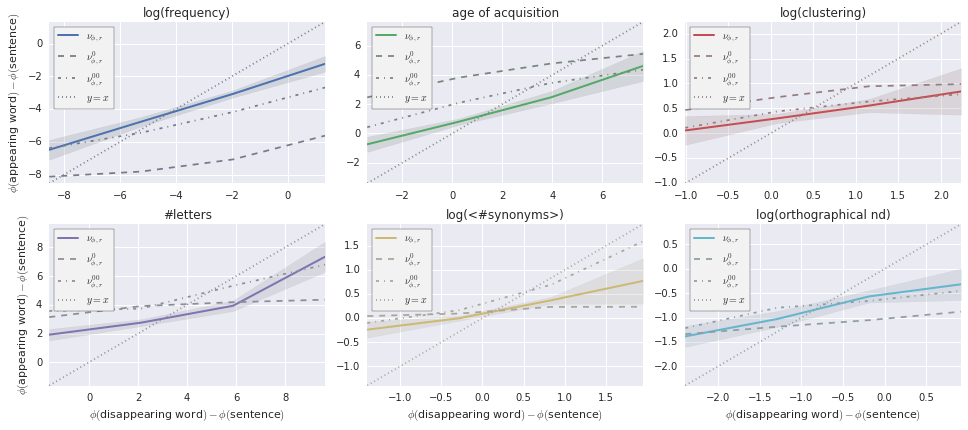

In [12]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1.5, size=3,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_variation, 'source', 'destination', relative=True)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($disappearing word$) - \phi($sentence$)$')
g.set_ylabels(r'$\phi($appearing word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_variations-relative'),
                  bbox_inches='tight', dpi=300)

And the same with features relative to sentence average

Now $\nu_{\phi} - \nu_{\phi}^{00}$

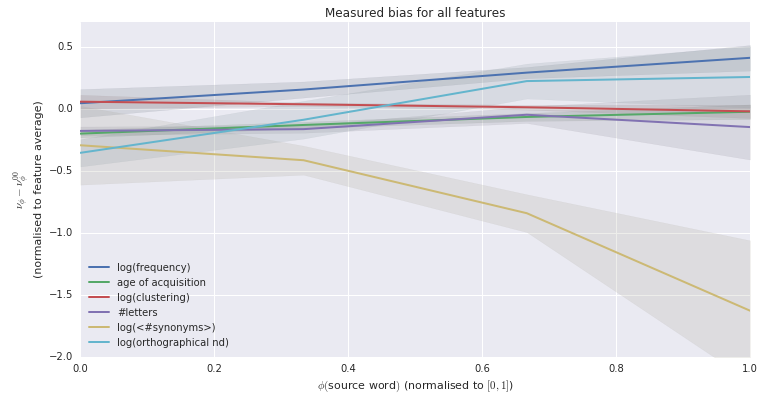

In [13]:
palette = sb.color_palette('deep', len(PAPER_FEATURES))
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j])
ax.legend(loc='lower left')
ax.set_title('Measured bias for all features')
ax.set_xlabel(r'$\phi($source word$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi} - \nu_{\phi}^{00}$' + '\n(normalised to feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-absolute'),
                bbox_inches='tight', dpi=300)

Now with sentence-relative features.

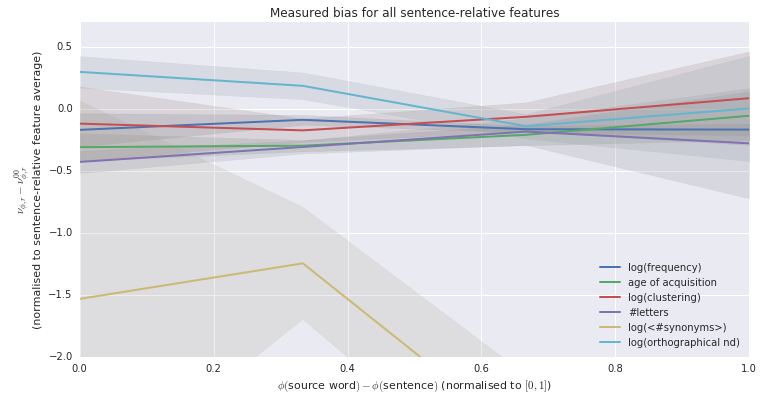

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
for j, feature in enumerate(PAPER_FEATURES):
    plot_bias(ax, variations[variations['feature'] == feature],
              color=palette[j], relative=True)
ax.legend(loc='lower right')
ax.set_title('Measured bias for all sentence-relative features')
ax.set_xlabel(r'$\phi($source word$) - \phi($sentence$)$ (normalised to $[0, 1]$)')
ax.set_ylabel(r'$\nu_{\phi,r} - \nu_{\phi,r}^{00}$' +
              '\n(normalised to sentence-relative feature average)')
ax.set_ylim(-2, .7)
if SAVE_FIGURES:
    fig.savefig(settings.FIGURE.format('paper-feature_bias-relative'),
                bbox_inches='tight', dpi=300)

## 3 Streamplots

We'd like to see what happens between absolute and relative feature values, i.e. how do their effects interact. Especially, we want to know who wins between cognitive bias, attraction to sentence average, or attraction to global feature average.

To do this we plot the general direction (arrows) and strength (color) of where destination words are given a particular absolute/relative source feature couple. I.e., for a given absolute feature value and relative feature value, if this word were to be substituted, where would it go in this (absolute, relative) space?

The interesting thing in these plots is the attraction front, where all arrows point to and join. We're interested in:
* its slope
* its shape (e.g. several slope regimes?)
* its position w.r.t. $\nu_{\phi}^0$ and $y = 0$ (which is $\left< \phi(sentence) \right>$)

First, here's our plotting function. (Note we set the arrow size to something that turns out to be huge here, but gives normal sizes in the figures saves. There must be some dpi scaling problem with the arrows.)

In [15]:
def plot_stream(**kwargs):
    data = kwargs.pop('data')
    color = kwargs.get('color', 'blue')
    source = data['source']
    source_rel = data['source_rel']
    dest = data['destination']
    dest_rel = data['destination_rel']
    h0 = data['h0']
    
    # Compute binning.
    bin_count = 4
    x_bins, x_margins = pd.cut(source, bin_count, right=False, labels=False, retbins=True)
    x_middles = (x_margins[:-1] + x_margins[1:]) / 2
    y_bins, y_margins = pd.cut(source_rel, bin_count, right=False, labels=False, retbins=True)
    y_middles = (y_margins[:-1] + y_margins[1:]) / 2
    
    # Compute bin values.
    h0s = np.ones(bin_count) * h0.iloc[0]
    u_values = np.zeros((bin_count, bin_count))
    v_values = np.zeros((bin_count, bin_count))
    strength = np.zeros((bin_count, bin_count))
    for x in range(bin_count):
        for y in range(bin_count):
            u_values[y, x] = (dest[(x_bins == x) & (y_bins == y)] -
                              source[(x_bins == x) & (y_bins == y)]).mean()
            v_values[y, x] = (dest_rel[(x_bins == x) & (y_bins == y)] -
                              source_rel[(x_bins == x) & (y_bins == y)]).mean()
            strength[y, x] = np.sqrt((dest[(x_bins == x) & (y_bins == y)] - 
                                      source[(x_bins == x) & (y_bins == y)]) ** 2 +
                                     (dest_rel[(x_bins == x) & (y_bins == y)] - 
                                      source_rel[(x_bins == x) & (y_bins == y)]) ** 2).mean()
    
    # Plot.
    plt.streamplot(x_middles, y_middles, u_values, v_values,
                   arrowsize=4, color=strength, cmap=plt.cm.viridis)
    plt.plot(x_middles, np.zeros(bin_count), linestyle='-',
             color=sb.desaturate(color, 0.2), label=r'$\left< \phi(sentence) \right>$')
    plt.plot(h0s, y_middles, linestyle='--',
             color=sb.desaturate(color, 0.2), label=r'$\nu_{\phi}^0$')
    plt.xlim(x_middles[0], x_middles[-1])
    plt.ylim(y_middles[0], y_middles[-1])

Here are the plots for all features

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


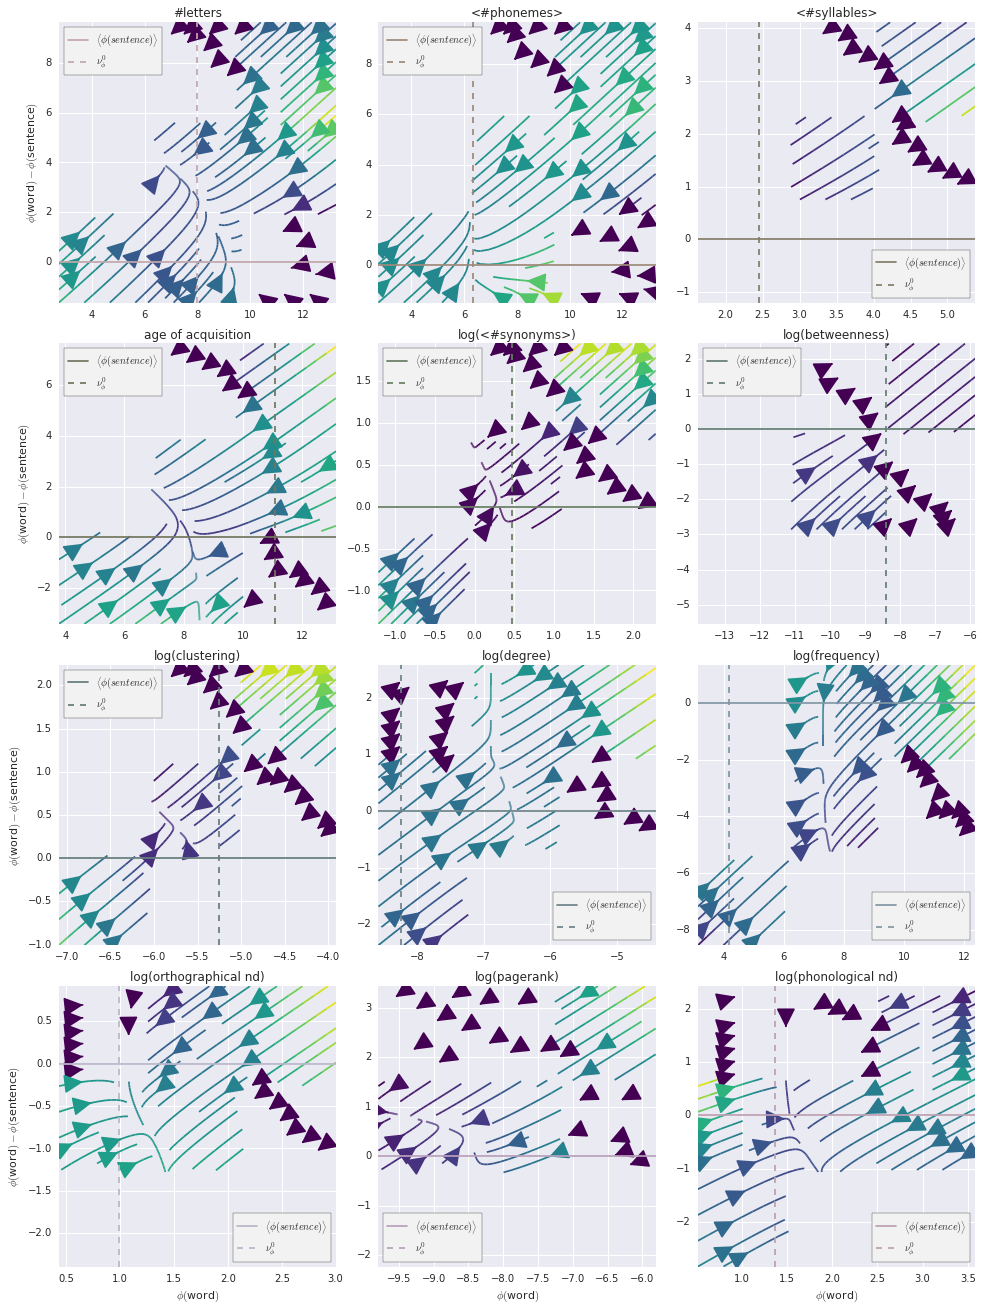

In [16]:
g = sb.FacetGrid(data=variations,
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=ordered_features, hue_order=ordered_features)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-feature_streams'),
                  bbox_inches='tight', dpi=300)

And here are the plots for the features we expose in the paper

/home/sl/.virtualenvs/brainscopypaste/lib/python3.5/site-packages/numpy/ma/core.py:4089: UserWarning: Warning: converting a masked element to nan.
  warnings.warn("Warning: converting a masked element to nan.")


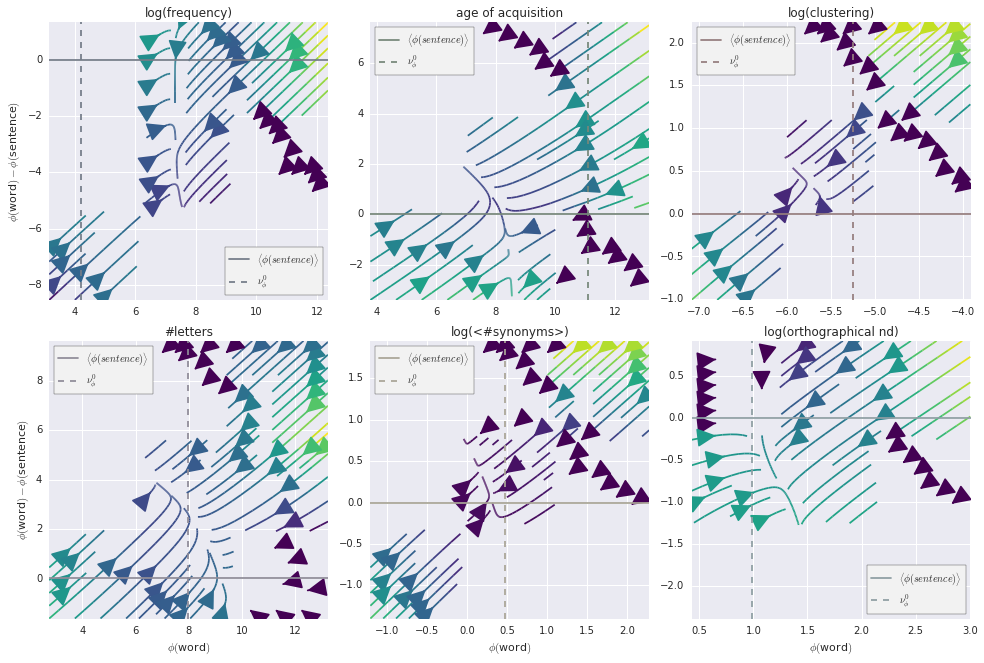

In [17]:
g = sb.FacetGrid(data=variations[variations['feature'].map(lambda f: f in PAPER_FEATURES)],
                 col='feature', col_wrap=3,
                 sharex=False, sharey=False, hue='feature',
                 aspect=1, size=4.5,
                 col_order=PAPER_FEATURES, hue_order=PAPER_FEATURES)
g.map_dataframe(plot_stream)
g.set_titles('{col_name}')
g.set_xlabels(r'$\phi($word$)$')
g.set_ylabels(r'$\phi($word$) - \phi($sentence$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='best')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
    ax.set_title(Substitution._transformed_feature(ax.get_title()).__doc__)
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-feature_streams'),
                  bbox_inches='tight', dpi=300)

## 4 PCA'd feature variations

Compute PCA on feature *variations* (note: on variations, not on features directly), and show the evolution of the first three components upon substitution.

**CAVEAT**: the PCA is computed on variations where all features are defined. This greatly reduces the number of words included (and also the number of substitutions -- see below for real values, but you should know it's drastic). This also has an effect on the computation of $\mathcal{H}_0$ and $\mathcal{H}_{00}$, which are computed using words for which all features are defined. This, again, hugely reduces the number of words taken into account.

### 4.1 On all the features

Compute the actual PCA

In [18]:
# Compute the PCA.
pcafeatures = tuple(sorted(Substitution.__features__))
pcavariations = variations.pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 11 components.

Those explain the following variance:
[ 0.52245078  0.19251006  0.08527331  0.06396759  0.03505744  0.02635584
  0.01929299  0.01827416  0.01452477  0.01087492  0.00680405]

We're plotting variation for the first 3 components:


,aoa,betweenness,clustering,degree,frequency,letters_count,orthographical_density,pagerank,phonemes_count,phonological_density,syllables_count,synonyms_count
Component-0,0.513371,-0.260037,0.089455,-0.230542,-0.168963,0.436561,-0.221708,-0.267066,0.408984,-0.274399,0.158971,-0.015237
Component-1,0.352568,-0.392710,0.173803,-0.304834,-0.232287,-0.409951,0.169533,-0.281756,-0.436341,0.247649,-0.126963,0.018872
Component-2,0.519121,0.097843,-0.089440,0.043894,0.829425,-0.094473,-0.006035,0.004883,-0.056386,0.063354,-0.015004,-0.081635


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [19]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  0% (   1 of 1678) |                     | Elapsed Time: 0:00:46 ETA:  21:52:07

  2% (  42 of 1678) |                      | Elapsed Time: 0:00:47 ETA:  0:00:00

  3% (  63 of 1678) |                      | Elapsed Time: 0:00:47 ETA:  0:00:00

  5% (  84 of 1678) |#                     | Elapsed Time: 0:00:47 ETA:  0:00:00

  6% ( 105 of 1678) |#                     | Elapsed Time: 0:00:48 ETA:  0:00:00

  7% ( 126 of 1678) |#                     | Elapsed Time: 0:00:48 ETA:  0:00:00

  8% ( 147 of 1678) |#                     | Elapsed Time: 0:00:48 ETA:  0:00:00

 11% ( 189 of 1678) |##                    | Elapsed Time: 0:00:49 ETA:  0:00:00

 12% ( 210 of 1678) |##                    | Elapsed Time: 0:00:49 ETA:  0:00:00

 13% ( 231 of 1678) |###                   | Elapsed Time: 0:00:49 ETA:  0:00:00

 15% ( 252 of 1678) |###                   | Elapsed Time: 0:00:49 ETA:  0:00:00

 16% ( 273 of 1678) |###                   | Elapsed Time: 0:00:50 ETA:  0:00:00

 17% ( 294 of 1678) |###                   | Elapsed Time: 0:00:50 ETA:  0:00:00

 18% ( 315 of 1678) |####                  | Elapsed Time: 0:00:50 ETA:  0:00:00

 21% ( 357 of 1678) |####                  | Elapsed Time: 0:00:51 ETA:  0:00:00

 22% ( 378 of 1678) |####                  | Elapsed Time: 0:00:51 ETA:  0:00:00

 23% ( 399 of 1678) |#####                 | Elapsed Time: 0:00:51 ETA:  0:00:00

 26% ( 441 of 1678) |#####                 | Elapsed Time: 0:00:52 ETA:  0:00:00

 28% ( 483 of 1678) |######                | Elapsed Time: 0:00:52 ETA:  0:00:00

 31% ( 525 of 1678) |######                | Elapsed Time: 0:00:52 ETA:  0:00:00

 32% ( 546 of 1678) |#######               | Elapsed Time: 0:00:53 ETA:  0:00:00

 33% ( 567 of 1678) |#######               | Elapsed Time: 0:00:53 ETA:  0:00:00

 36% ( 609 of 1678) |#######               | Elapsed Time: 0:00:53 ETA:  0:00:00

 38% ( 651 of 1678) |########              | Elapsed Time: 0:00:54 ETA:  0:00:00

 40% ( 672 of 1678) |########              | Elapsed Time: 0:00:54 ETA:  0:00:00

 42% ( 714 of 1678) |#########             | Elapsed Time: 0:00:54 ETA:  0:00:00

 43% ( 735 of 1678) |#########             | Elapsed Time: 0:00:54 ETA:  0:00:00

 45% ( 756 of 1678) |#########             | Elapsed Time: 0:00:55 ETA:  0:00:00

 47% ( 798 of 1678) |##########            | Elapsed Time: 0:00:55 ETA:  0:00:00

 50% ( 840 of 1678) |###########           | Elapsed Time: 0:00:55 ETA:  0:00:00

 52% ( 881 of 1678) |###########           | Elapsed Time: 0:00:56 ETA:  0:00:00

 55% ( 923 of 1678) |############          | Elapsed Time: 0:00:56 ETA:  0:00:00

 57% ( 965 of 1678) |############          | Elapsed Time: 0:00:56 ETA:  0:00:00

 60% (1007 of 1678) |#############         | Elapsed Time: 0:00:57 ETA:  0:00:00

 62% (1049 of 1678) |#############         | Elapsed Time: 0:00:57 ETA:  0:00:00

 65% (1091 of 1678) |##############        | Elapsed Time: 0:00:58 ETA:  0:00:00

 67% (1133 of 1678) |##############        | Elapsed Time: 0:00:58 ETA:  0:00:00

 70% (1175 of 1678) |###############       | Elapsed Time: 0:00:58 ETA:  0:00:00

 71% (1196 of 1678) |###############       | Elapsed Time: 0:00:58 ETA:  0:00:00

 72% (1217 of 1678) |###############       | Elapsed Time: 0:00:59 ETA:  0:00:00

 73% (1238 of 1678) |################      | Elapsed Time: 0:00:59 ETA:  0:00:00

 75% (1259 of 1678) |################      | Elapsed Time: 0:00:59 ETA:  0:00:00

 76% (1280 of 1678) |################      | Elapsed Time: 0:00:59 ETA:  0:00:00

 78% (1322 of 1678) |#################     | Elapsed Time: 0:01:00 ETA:  0:00:00

 80% (1343 of 1678) |#################     | Elapsed Time: 0:01:00 ETA:  0:00:00

 81% (1364 of 1678) |#################     | Elapsed Time: 0:01:00 ETA:  0:00:00

 82% (1385 of 1678) |##################    | Elapsed Time: 0:01:00 ETA:  0:00:00

 85% (1427 of 1678) |##################    | Elapsed Time: 0:01:01 ETA:  0:00:00

 87% (1469 of 1678) |###################   | Elapsed Time: 0:01:01 ETA:  0:00:00

 90% (1511 of 1678) |###################   | Elapsed Time: 0:01:02 ETA:  0:00:00

 92% (1553 of 1678) |####################  | Elapsed Time: 0:01:02 ETA:  0:00:00

 95% (1595 of 1678) |####################  | Elapsed Time: 0:01:02 ETA:  0:00:00

 97% (1637 of 1678) |##################### | Elapsed Time: 0:01:03 ETA:  0:00:00

 98% (1658 of 1678) |##################### | Elapsed Time: 0:01:03 ETA:  0:00:00

100% (1678 of 1678) |######################| Elapsed Time: 0:01:03 Time: 0:01:03


Compute cluster averages (so as not to overestimate confidence intervals).

In [20]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components (**see the caveat section below**)

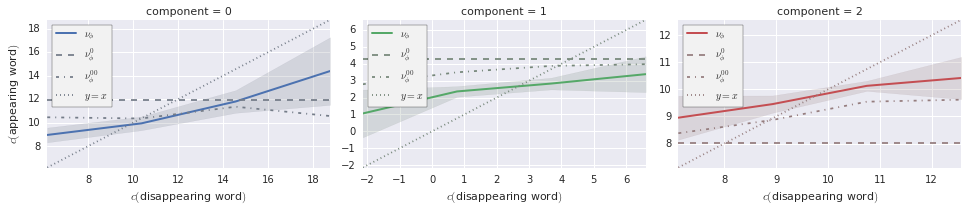

In [21]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('all-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.2 On the features we expose in the paper

Compute the actual PCA

In [22]:
# Compute the PCA.
pcafeatures = tuple(sorted(PAPER_FEATURES))
pcavariations = variations[variations['feature'].map(lambda f: f in pcafeatures)]\
    .pivot(index='cluster_id', columns='feature', values='variation')
pcavariations = pcavariations.dropna()
pca = PCA(n_components='mle')
pca.fit(pcavariations)

# Show 
print('MLE estimates there are {} components.\n'.format(pca.n_components_))
print('Those explain the following variance:')
print(pca.explained_variance_ratio_)
print()

print("We're plotting variation for the first {} components:".format(N_COMPONENTS))
pd.DataFrame(pca.components_[:N_COMPONENTS],
             columns=pcafeatures,
             index=['Component-{}'.format(i) for i in range(N_COMPONENTS)])

MLE estimates there are 3 components.

Those explain the following variance:
[ 0.56179799  0.17999918  0.15932478]

We're plotting variation for the first 3 components:


,aoa,clustering,frequency,letters_count,orthographical_density,synonyms_count
Component-0,0.753800,0.115534,-0.260879,0.524134,-0.274510,-0.017539
Component-1,0.384576,0.220490,-0.489661,-0.689589,0.296629,0.013995
Component-2,-0.507055,0.060208,-0.806058,0.278343,-0.074687,0.080551


Compute the source and destination component values, along with $\mathcal{H}_0$ and $\mathcal{H}_{00}$, for each component.

In [23]:
data = []
for substitution_id in ProgressBar(term_width=80)(substitution_ids):
    with session_scope() as session:
        substitution = session.query(Substitution).get(substitution_id)
        
        for component in range(N_COMPONENTS):
            source, destination = substitution.components(component, pca, pcafeatures)
            data.append({'cluster_id': substitution.source.cluster.sid,
                         'destination_id': substitution.destination.sid,
                         'occurrence': substitution.occurrence,
                         'source_id': substitution.source.sid,
                         'component': component,
                         'source': source,
                         'destination': destination,
                         'h0': substitution.component_average(component, pca, pcafeatures),
                         'h0n': substitution.component_average(component, pca, pcafeatures,
                                                               source_synonyms=True)})

original_component_variations = pd.DataFrame(data)
del data

  1% (  21 of 1678) |                      | Elapsed Time: 0:00:14 ETA:  0:00:02

  3% (  63 of 1678) |                      | Elapsed Time: 0:00:14 ETA:  0:00:01

  6% ( 105 of 1678) |#                     | Elapsed Time: 0:00:15 ETA:  0:00:00

  7% ( 126 of 1678) |#                     | Elapsed Time: 0:00:15 ETA:  0:00:00

  8% ( 147 of 1678) |#                     | Elapsed Time: 0:00:15 ETA:  0:00:00

 10% ( 168 of 1678) |##                    | Elapsed Time: 0:00:15 ETA:  0:00:00

 11% ( 189 of 1678) |##                    | Elapsed Time: 0:00:16 ETA:  0:00:00

 13% ( 231 of 1678) |###                   | Elapsed Time: 0:00:16 ETA:  0:00:00

 16% ( 273 of 1678) |###                   | Elapsed Time: 0:00:16 ETA:  0:00:00

 17% ( 294 of 1678) |###                   | Elapsed Time: 0:00:17 ETA:  0:00:00

 18% ( 315 of 1678) |####                  | Elapsed Time: 0:00:17 ETA:  0:00:00

 21% ( 357 of 1678) |####                  | Elapsed Time: 0:00:17 ETA:  0:00:00

 23% ( 399 of 1678) |#####                 | Elapsed Time: 0:00:18 ETA:  0:00:00

 25% ( 420 of 1678) |#####                 | Elapsed Time: 0:00:18 ETA:  0:00:00

 27% ( 462 of 1678) |######                | Elapsed Time: 0:00:18 ETA:  0:00:00

 28% ( 483 of 1678) |######                | Elapsed Time: 0:00:18 ETA:  0:00:00

 31% ( 525 of 1678) |######                | Elapsed Time: 0:00:19 ETA:  0:00:00

 32% ( 546 of 1678) |#######               | Elapsed Time: 0:00:19 ETA:  0:00:00

 35% ( 588 of 1678) |#######               | Elapsed Time: 0:00:19 ETA:  0:00:00

 37% ( 630 of 1678) |########              | Elapsed Time: 0:00:20 ETA:  0:00:00

 38% ( 651 of 1678) |########              | Elapsed Time: 0:00:20 ETA:  0:00:00

 41% ( 693 of 1678) |#########             | Elapsed Time: 0:00:20 ETA:  0:00:00

 43% ( 735 of 1678) |#########             | Elapsed Time: 0:00:21 ETA:  0:00:00

 46% ( 777 of 1678) |##########            | Elapsed Time: 0:00:21 ETA:  0:00:00

 48% ( 819 of 1678) |##########            | Elapsed Time: 0:00:21 ETA:  0:00:00

 51% ( 860 of 1678) |###########           | Elapsed Time: 0:00:22 ETA:  0:00:00

 53% ( 902 of 1678) |###########           | Elapsed Time: 0:00:22 ETA:  0:00:00

 56% ( 944 of 1678) |############          | Elapsed Time: 0:00:22 ETA:  0:00:00

 58% ( 986 of 1678) |############          | Elapsed Time: 0:00:23 ETA:  0:00:00

 61% (1028 of 1678) |#############         | Elapsed Time: 0:00:23 ETA:  0:00:00

 63% (1070 of 1678) |##############        | Elapsed Time: 0:00:23 ETA:  0:00:00

 66% (1112 of 1678) |##############        | Elapsed Time: 0:00:24 ETA:  0:00:00

 68% (1154 of 1678) |###############       | Elapsed Time: 0:00:24 ETA:  0:00:00

 71% (1196 of 1678) |###############       | Elapsed Time: 0:00:24 ETA:  0:00:00

 73% (1238 of 1678) |################      | Elapsed Time: 0:00:25 ETA:  0:00:00

 76% (1280 of 1678) |################      | Elapsed Time: 0:00:25 ETA:  0:00:00

 78% (1322 of 1678) |#################     | Elapsed Time: 0:00:26 ETA:  0:00:00

 80% (1343 of 1678) |#################     | Elapsed Time: 0:00:26 ETA:  0:00:00

 82% (1385 of 1678) |##################    | Elapsed Time: 0:00:26 ETA:  0:00:00

 85% (1427 of 1678) |##################    | Elapsed Time: 0:00:26 ETA:  0:00:00

 87% (1469 of 1678) |###################   | Elapsed Time: 0:00:27 ETA:  0:00:00

 90% (1511 of 1678) |###################   | Elapsed Time: 0:00:27 ETA:  0:00:00

 92% (1553 of 1678) |####################  | Elapsed Time: 0:00:27 ETA:  0:00:00

 95% (1595 of 1678) |####################  | Elapsed Time: 0:00:28 ETA:  0:00:00

 97% (1637 of 1678) |##################### | Elapsed Time: 0:00:28 ETA:  0:00:00

100% (1678 of 1678) |######################| Elapsed Time: 0:00:28 Time: 0:00:28


Compute cluster averages (so as not to overestimate confidence intervals).

In [24]:
component_variations = original_component_variations\
    .groupby(['destination_id', 'occurrence', 'component'], as_index=False).mean()\
    .groupby(['cluster_id', 'component'], as_index=False)\
    ['source', 'destination', 'component', 'h0', 'h0n'].mean()

Plot the actual variations of components

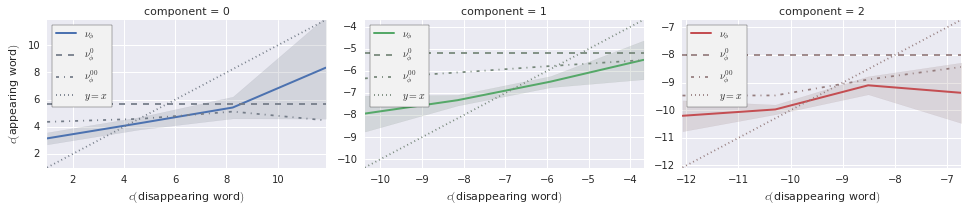

In [25]:
g = sb.FacetGrid(data=component_variations, col='component', col_wrap=3,
                 sharex=False, sharey=False, hue='component',
                 aspect=1.5, size=3)
g.map_dataframe(plot_variation, 'source', 'destination')
g.set_xlabels(r'$c($disappearing word$)$')
g.set_ylabels(r'$c($appearing word$)$')
for ax in g.axes.ravel():
    legend = ax.legend(frameon=True, loc='upper left')
    if not legend:
        # Skip if nothing was plotted on these axes.
        continue
    frame = legend.get_frame()
    frame.set_facecolor('#f2f2f2')
    frame.set_edgecolor('#000000')
if SAVE_FIGURES:
    g.fig.savefig(settings.FIGURE.format('paper-pca_variations-absolute'),
                  bbox_inches='tight', dpi=300)

### 4.3 CAVEAT: reduction of the numbers of words and substitutions

As explained above, this PCA analysis can only use words for which *all* the features are defined (in this case, the features listed in `PAPER_FEATURES`). So note the following:

In [26]:
for feature in PAPER_FEATURES:
    print("Feature '{}' is based on {} words."
          .format(feature, len(Substitution._transformed_feature(feature)())))

# Compute the number of words that have all PAPER_FEATURES defined.
words = set()
for tfeature in [Substitution._transformed_feature(feature) for feature in PAPER_FEATURES]:
    words.update(tfeature())

data = dict((feature, []) for feature in PAPER_FEATURES)
words_list = []
for word in words:
    words_list.append(word)
    for feature in PAPER_FEATURES:
        data[feature].append(Substitution._transformed_feature(feature)(word))
wordsdf = pd.DataFrame(data)
wordsdf['words'] = words_list
del words_list, data

print()
print("Among all the set of words used by these features, only {} are used."
      .format(len(wordsdf.dropna())))

print()
print("Similarly, we mined {} (cluster-unique) substitutions, but the PCA is in fact"
      " computed on {} of them (those where all features are defined)."
      .format(len(set(variations['cluster_id'])), len(pcavariations)))

Feature 'frequency' is based on 33450 words.
Feature 'aoa' is based on 30102 words.
Feature 'clustering' is based on 5739 words.
Feature 'letters_count' is based on 42786 words.
Feature 'synonyms_count' is based on 147306 words.
Feature 'orthographical_density' is based on 27751 words.



Among all the set of words used by these features, only 3322 are used.

Similarly, we mined 1094 (cluster-unique) substitutions, but the PCA is in fact computed on 308 of them (those where all features are defined).


The way $\mathcal{H}_0$ and $\mathcal{H}_{00}$ are computed makes them also affected by this.